<a href="https://colab.research.google.com/github/koushik0416/eda/blob/main/eda_Da_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
print("hello world")

hello world


# uploading the csv file

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [5]:
# Load the dataset
data = pd.read_csv(next(iter(uploaded)))

# Module 2: Data Transformation
Tasks: Handle Missing Values, Replace Values, Deduplication, Discretization

In [6]:
import pandas as pd
import numpy as np


dataset = data.copy()

# 1. Handling missing values
# Replace '?' with NaN for proper handling
dataset.replace('?', np.nan, inplace=True)

# Convert numeric columns stored as objects to numeric
numeric_cols = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
for col in numeric_cols:
    dataset[col] = pd.to_numeric(dataset[col], errors='coerce')

# Fill missing values with mean for numeric columns
# Only apply mean to numeric columns
numeric_dataset = dataset.select_dtypes(include=np.number)  # Select only numeric columns
dataset[numeric_dataset.columns] = numeric_dataset.fillna(numeric_dataset.mean()) # Fill NaNs in numeric columns with their mean


# Fill missing values with mode for categorical columns
for col in dataset.select_dtypes(include='object'):
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)

# 2. Deduplication
dataset = dataset.drop_duplicates()

# 3. Discretization/Binning
# Example: Binning the `price` column into categories
price_bins = [0, 10000, 20000, 40000, np.inf]
price_labels = ['Low', 'Medium', 'High', 'Luxury']
dataset['price_category'] = pd.cut(dataset['price'], bins=price_bins, labels=price_labels)

# Preview dataset after transformation
print(dataset.head())

   symboling  normalized-losses         make fuel-type aspiration  \
0          3              122.0  alfa-romero       gas        std   
1          3              122.0  alfa-romero       gas        std   
2          1              122.0  alfa-romero       gas        std   
3          2              164.0         audi       gas        std   
4          2              164.0         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   fuel-system  bore  stroke  compression-ratio horsepower peak-rpm  city-mpg  \
0         mpfi  3.47    2.68             

<ipython-input-6-94ca0262fbab>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[col].fillna(dataset[col].mode()[0], inplace=True)


# Module 3: Correlation Analysis
Tasks: Univariate, Bivariate, Multivariate Analysis

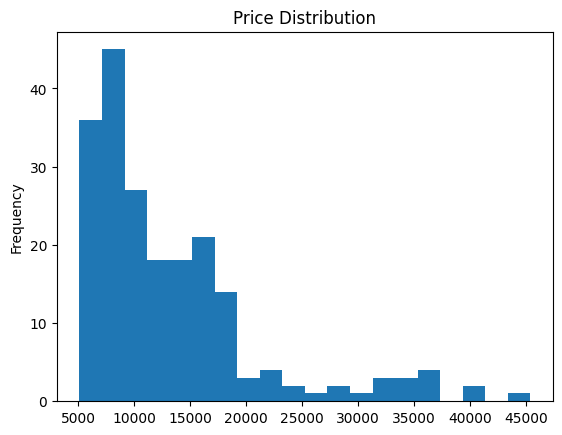

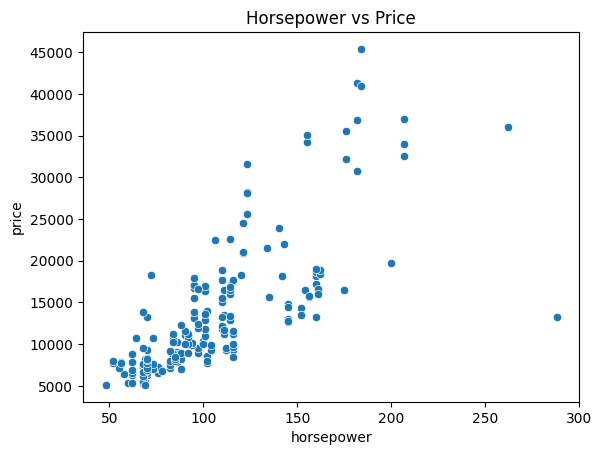

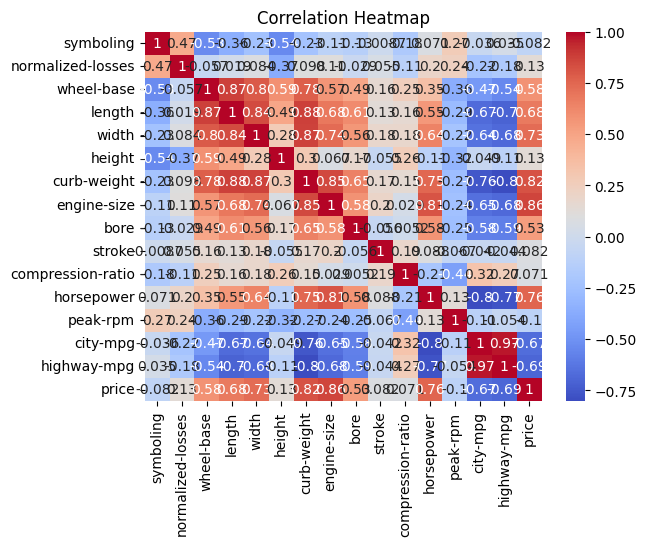

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Univariate Analysis
dataset['price'].plot(kind='hist', bins=20, title='Price Distribution')
plt.show()

# 2. Bivariate Analysis
sns.scatterplot(data=dataset, x='horsepower', y='price')
plt.title('Horsepower vs Price')
plt.show()

# 3. Multivariate Analysis
# Select only numeric features for correlation analysis
numeric_features = dataset.select_dtypes(include=np.number)
correlation_matrix = numeric_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [8]:
# Check if a date/time column exists
if 'date' not in dataset.columns:
    # Simulate a date column
    dataset['date'] = pd.date_range(start='2020-01-01', periods=len(dataset), freq='M')

# Set the 'date' column as the index
dataset['date'] = pd.to_datetime(dataset['date'])
dataset.set_index('date', inplace=True)

# Preview the dataset
print(dataset.head())


            symboling  normalized-losses         make fuel-type aspiration  \
date                                                                         
2020-01-31          3              122.0  alfa-romero       gas        std   
2020-02-29          3              122.0  alfa-romero       gas        std   
2020-03-31          1              122.0  alfa-romero       gas        std   
2020-04-30          2              164.0         audi       gas        std   
2020-05-31          2              164.0         audi       gas        std   

           num-of-doors   body-style drive-wheels engine-location  wheel-base  \
date                                                                            
2020-01-31          two  convertible          rwd           front        88.6   
2020-02-29          two  convertible          rwd           front        88.6   
2020-03-31          two    hatchback          rwd           front        94.5   
2020-04-30         four        sedan          fw

<ipython-input-8-285df2b8dd5a>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dataset['date'] = pd.date_range(start='2020-01-01', periods=len(dataset), freq='M')


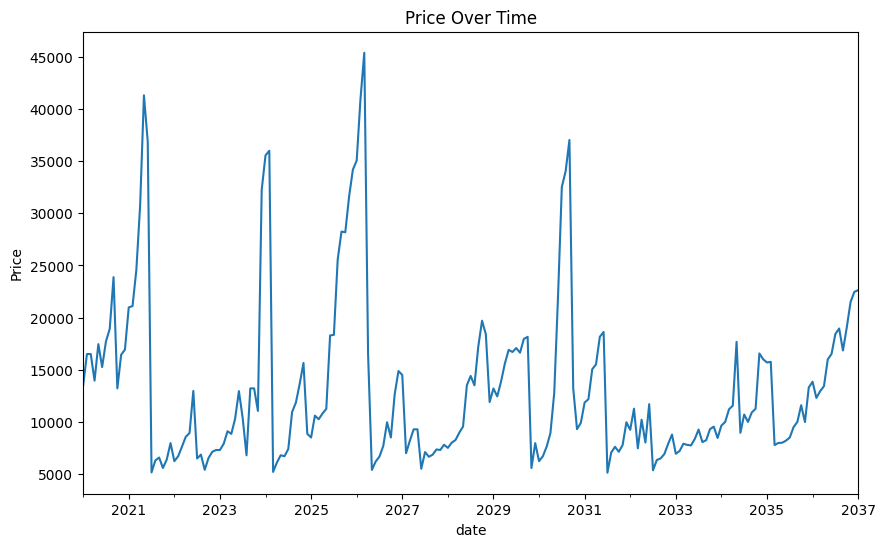

In [9]:
# Visualize a time series feature, e.g., 'price' (replace with a suitable column)
dataset['price'].plot(figsize=(10, 6), title='Price Over Time', ylabel='Price')
plt.show()


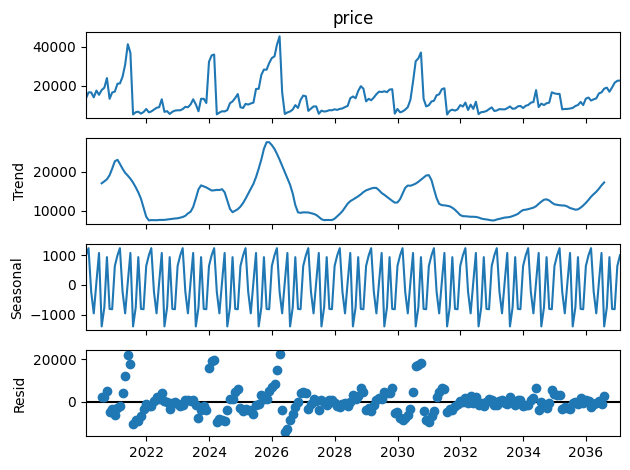

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series (adjust column as needed)
result = seasonal_decompose(dataset['price'], model='additive', period=12)

# Plot decomposition
result.plot()
plt.show()


<ipython-input-11-745466bc649a>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = dataset['price'].resample('M').mean()


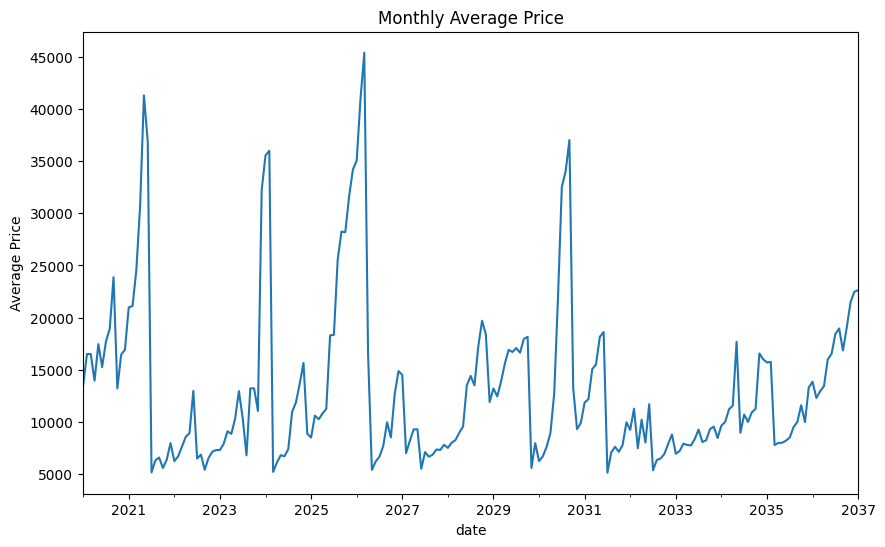

In [11]:
# Resample data to monthly averages
monthly_avg = dataset['price'].resample('M').mean()

# Visualize resampled data
monthly_avg.plot(figsize=(10, 6), title='Monthly Average Price', ylabel='Average Price')
plt.show()


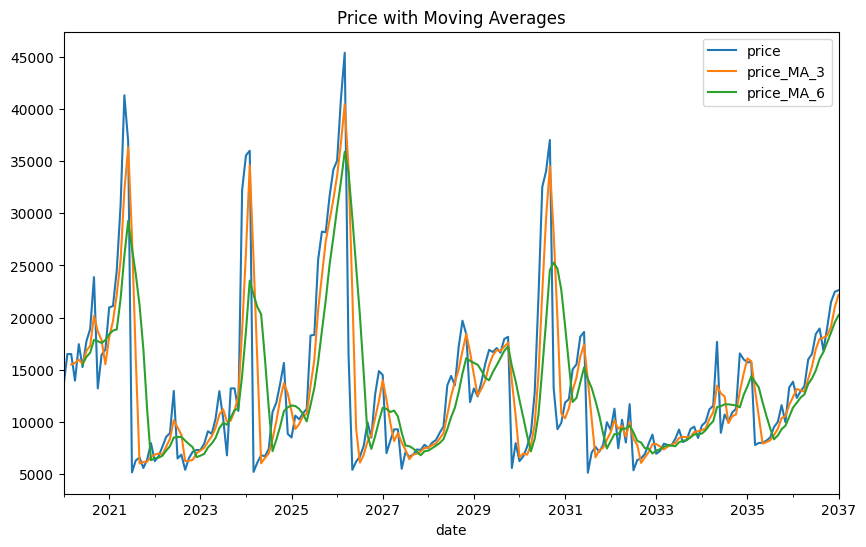

In [12]:
# Calculate moving averages
dataset['price_MA_3'] = dataset['price'].rolling(window=3).mean()  # 3-month MA
dataset['price_MA_6'] = dataset['price'].rolling(window=6).mean()  # 6-month MA

# Plot moving averages
dataset[['price', 'price_MA_3', 'price_MA_6']].plot(figsize=(10, 6), title='Price with Moving Averages')
plt.show()


<ipython-input-13-1673e9f95069>:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_avg = dataset['price'].resample('Y').mean()


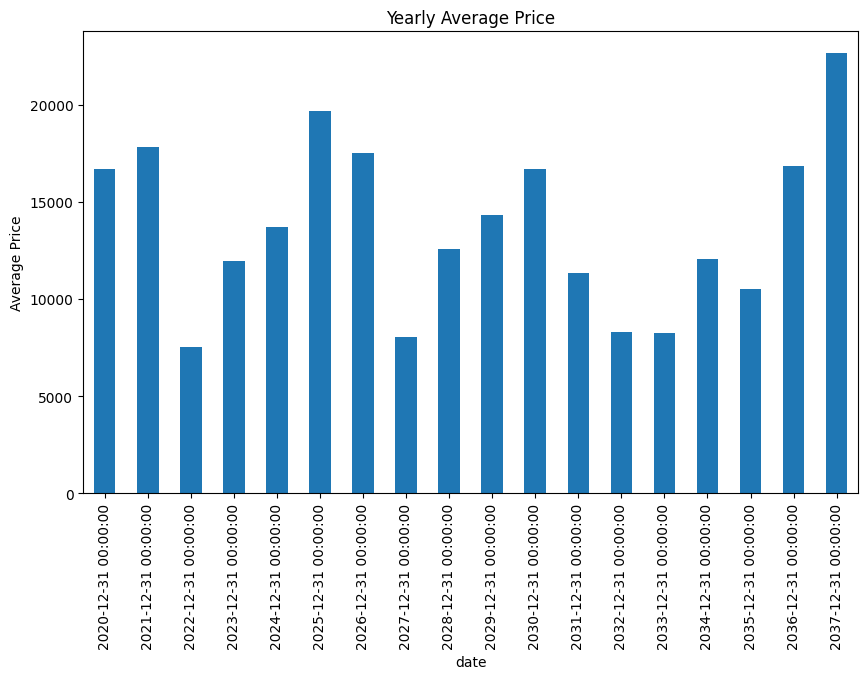

In [13]:
# Group data by year and calculate averages
yearly_avg = dataset['price'].resample('Y').mean()

# Plot yearly averages
yearly_avg.plot(kind='bar', figsize=(10, 6), title='Yearly Average Price', ylabel='Average Price')
plt.show()


# Module 4: Data Summarization and Visualization
Tasks: Statistical Summaries and Visualizations

        symboling  normalized-losses  wheel-base      length       width  \
count  205.000000         205.000000  205.000000  205.000000  205.000000   
mean     0.834146         122.000000   98.756585  174.049268   65.907805   
std      1.245307          31.681008    6.021776   12.337289    2.145204   
min     -2.000000          65.000000   86.600000  141.100000   60.300000   
25%      0.000000         101.000000   94.500000  166.300000   64.100000   
50%      1.000000         122.000000   97.000000  173.200000   65.500000   
75%      2.000000         137.000000  102.400000  183.100000   66.900000   
max      3.000000         256.000000  120.900000  208.100000   72.300000   

           height  curb-weight  engine-size        bore      stroke  \
count  205.000000   205.000000   205.000000  205.000000  205.000000   
mean    53.724878  2555.565854   126.907317    3.329751    3.255423   
std      2.443522   520.680204    41.642693    0.270844    0.313597   
min     47.800000  1488.000000 

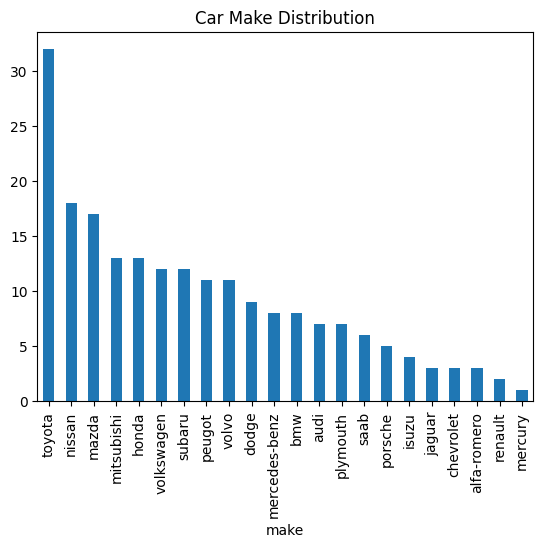

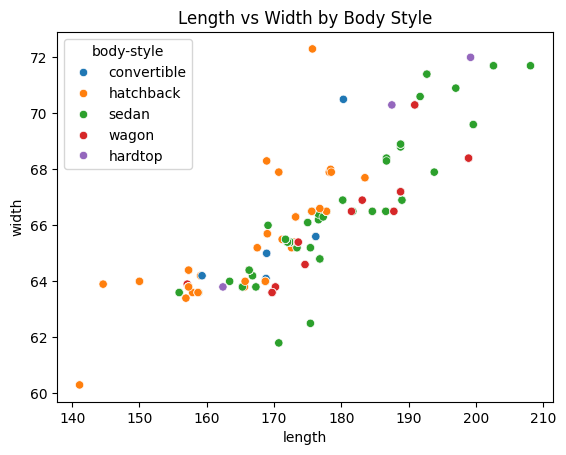

In [14]:
# Statistical summary
print(dataset.describe())
# Calculate skewness and kurtosis for numeric features
numeric_features = dataset.select_dtypes(include=np.number)
skewness = numeric_features.skew()
kurtosis = numeric_features.kurt()

print("Skewness:\n", skewness)
print("\nKurtosis:\n", kurtosis)

# Bar plot: Distribution of car makes
dataset['make'].value_counts().plot(kind='bar', title='Car Make Distribution')
plt.show()

# Scatter plot: Length vs. Width
sns.scatterplot(data=dataset, x='length', y='width', hue='body-style')
plt.title('Length vs Width by Body Style')
plt.show()


#Module 5: Clustering Algorithms
Tasks: Spectral Clustering and K-Means

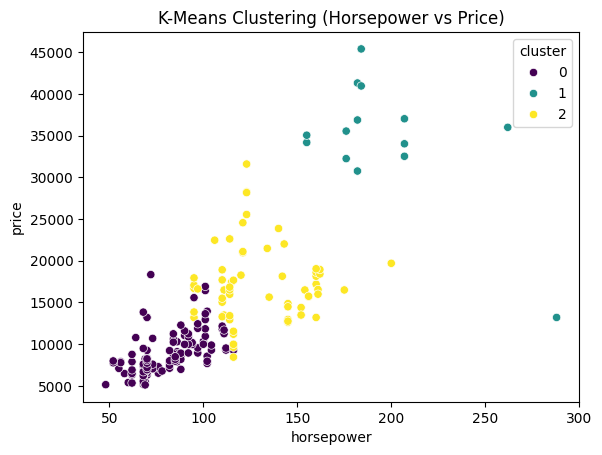

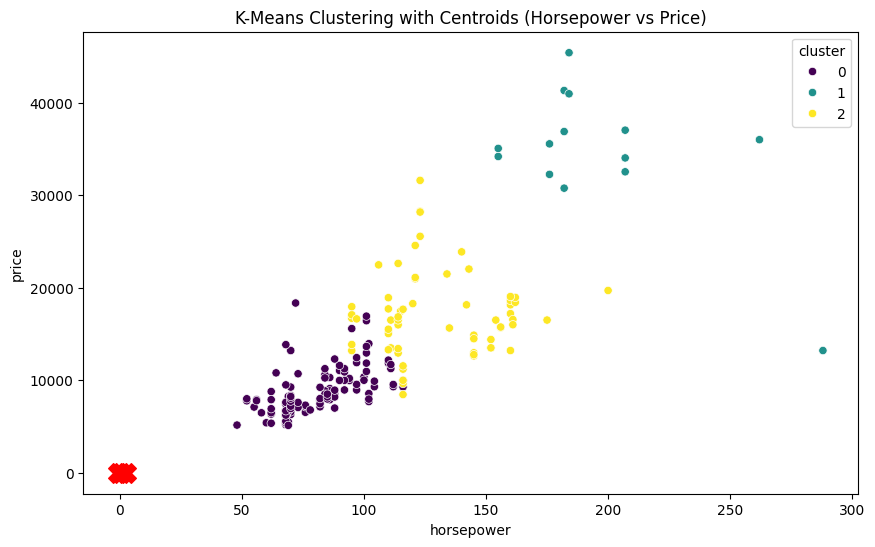

In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting features for clustering
features = dataset[['horsepower', 'engine-size', 'price']].dropna()

# Scaling the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
dataset['cluster'] = clusters

# Visualizing Clusters
sns.scatterplot(data=dataset, x='horsepower', y='price', hue='cluster', palette='viridis')
plt.title('K-Means Clustering (Horsepower vs Price)')
plt.show()

# Plotting with cluster centroids
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='horsepower', y='price', hue='cluster', palette='viridis')
centroids = kmeans.cluster_centers_  # Getting the centroids of clusters
plt.scatter(centroids[:, 0], centroids[:, 2], s=200, c='red', marker='X')  # Plot centroids
plt.title('K-Means Clustering with Centroids (Horsepower vs Price)')
plt.show()



# 2. Spectral Clustering:

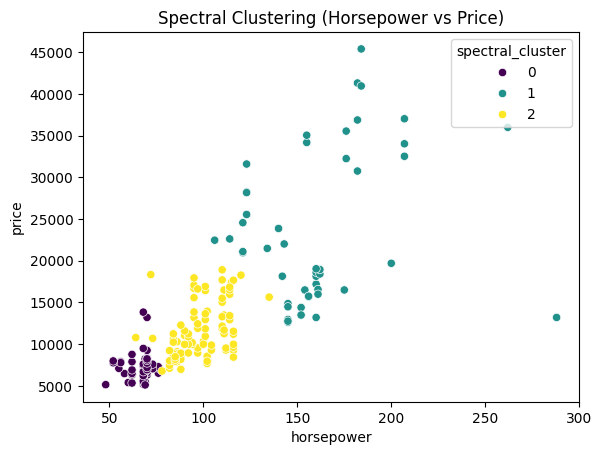

In [24]:
from sklearn.cluster import SpectralClustering

# Apply Spectral Clustering
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
spectral_clusters = spectral.fit_predict(scaled_features)
dataset['spectral_cluster'] = spectral_clusters

# Visualize Spectral Clustering
sns.scatterplot(data=dataset, x='horsepower', y='price', hue='spectral_cluster', palette='viridis')
plt.title('Spectral Clustering (Horsepower vs Price)')
plt.show()


# 3. Document Clustering (Text Clustering):

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# **Replace 'actual_text_column_name' with the correct column name**
text_data = dataset['body-style'].dropna()  # Changed 'text_column' to 'actual_text_column_name'

# Convert text data to TF-IDF features
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(text_data)

# Apply K-Means clustering on the text data
kmeans_text = KMeans(n_clusters=3, random_state=42)
text_clusters = kmeans_text.fit_predict(tfidf_matrix)

# Add text clusters to the dataset
dataset['text_cluster'] = text_clusters

#4. Visualizing Clusters:

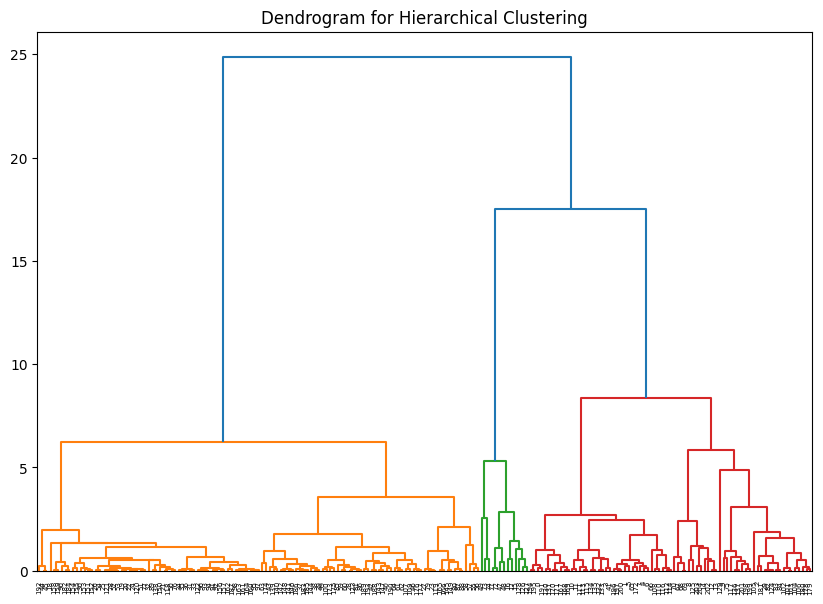

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform hierarchical clustering
Z = linkage(scaled_features, method='ward')

# Create a dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()


# 5. Outlier Detection Using Clustering:

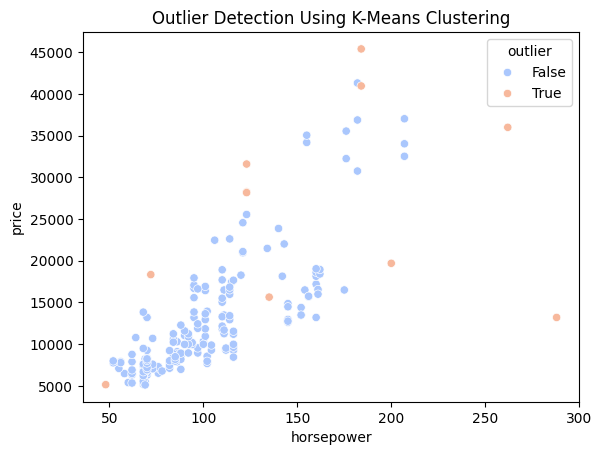

In [29]:
import numpy as np

# Calculate the distance of each point to its closest cluster centroid
distances = kmeans.transform(scaled_features)
min_distances = np.min(distances, axis=1)

# Define a threshold for outliers (e.g., points with distance > threshold are outliers)
threshold = np.percentile(min_distances, 95)  # Set threshold at 95th percentile
outliers = min_distances > threshold

# Visualize outliers
dataset['outlier'] = outliers
sns.scatterplot(data=dataset, x='horsepower', y='price', hue='outlier', palette='coolwarm')
plt.title('Outlier Detection Using K-Means Clustering')
plt.show()


# Module 6: Dimensionality Reduction

# a) Principal Component Analysis (PCA)

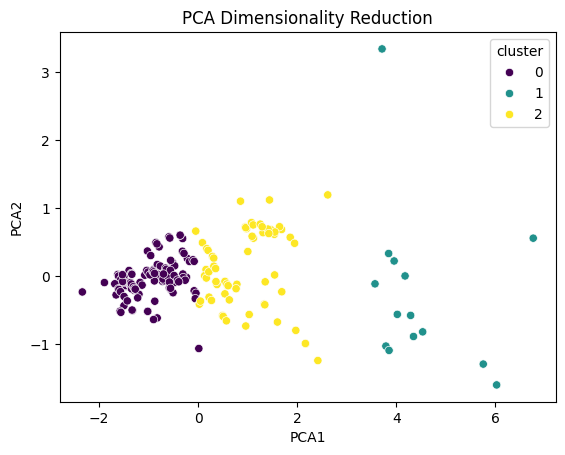

In [16]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Add PCA results to dataset
dataset['PCA1'] = pca_features[:, 0]
dataset['PCA2'] = pca_features[:, 1]

# Visualizing PCA results
sns.scatterplot(data=dataset, x='PCA1', y='PCA2', hue='cluster', palette='viridis')
plt.title('PCA Dimensionality Reduction')
plt.show()


# Module 7: Model Development and Evaluation
Tasks: Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Splitting data
X = dataset[['horsepower', 'engine-size']].dropna()
y = dataset['price'].dropna()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions and evaluation
y_pred = lr.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R² Score: 0.7931492026547782
MSE: 16128586.025692128


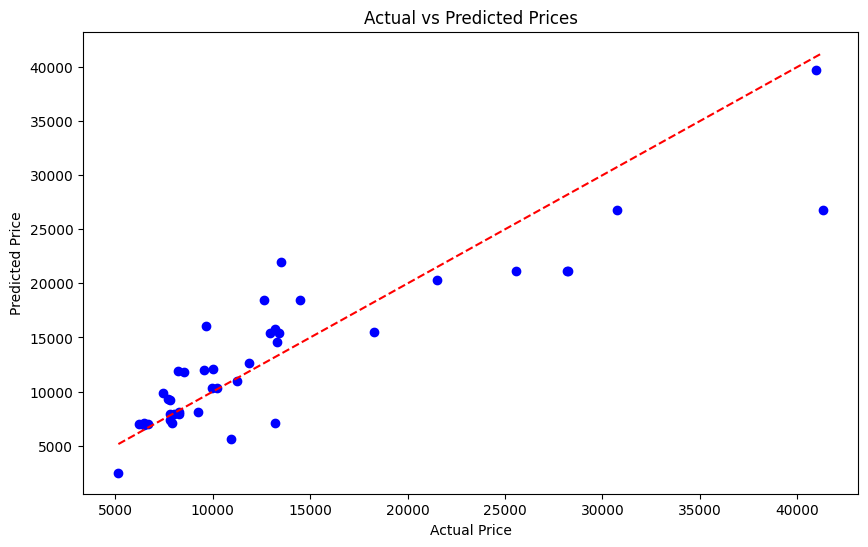

In [22]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'dataset' is defined and contains the data

# Splitting data
X = dataset[['horsepower', 'engine-size']].dropna()
y = dataset['price'].dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model # This part was missing, leading to the error
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()